<a href="https://colab.research.google.com/github/minit88/Matplotlib/blob/main/Lab_05/Z_TransForm_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 극점-영점 계산과 플롯
def zplane(b, a, ax, auto_scale=True, rmax=1.5):
    """
    zplane: plot pole-zero pattern in the complex z-plane
    given a transfer function.
    parameters:
        b = numerator coefficients
        a = denominator coefficients
        (z,p,k) = array of zeros, poles, and gain
    """
    # 단위원
    theta = np.linspace(0, 2 * np.pi, 360)
    ax.plot(np.cos(theta), np.sin(theta), color='0.4', lw=0.5)

    # 극점-영점 계산
    z, p, k = signal.tf2zpk(b, a)
    if len(z)>0:
        # 영점의 다중성 점검
        z_unique, z_multi = signal.unique_roots(z, tol=1e-04)
        unique = z_unique[z_multi>1]
        multi = z_multi[z_multi>1]
        # 영점 플롯
        ax.plot(z_unique.real, z_unique.imag, color='C1', marker='o', mfc='none', lw=0, ms=8)
        if len(multi>1)!=0:
            for m, zk in enumerate(unique):
                ax.text(zk.real+0.06, zk.imag+0.07, '('+str(multi[m])+')')
    if len(p)>0:
        # 극점의 다중성 점검
        p_unique, p_multi = signal.unique_roots(p, tol=1e-04)
        unique = p_unique[p_multi > 1]
        multi = p_multi[p_multi > 1]
        if len(multi > 1) != 0:
            for m, zk in enumerate(unique):
                ax.text(zk.real+0.06, zk.imag+0.07, '(' + str(multi[m]) + ')')
        # 극점 플롯
        ax.plot(p_unique.real, p_unique.imag, color='C1', marker='x', mfc='none', lw=0, ms=8)
    # 축 설정
    zp = np.concatenate((z, p))
    if auto_scale:
        r = np.max(np.abs(zp)) + 0.5
    else:
        r = rmax
    ax.axhline(0, color='0.5',lw=0.5)
    ax.axvline(0, color='0.5',lw=0.5)
    ax.set_xlim([-r, r]); ax.set_ylim([-r, r])
    ax.set_xlabel('Real')
    ax.set_ylabel('Imag')
    ax.set_title('pole-zero plot')
    ax.set_aspect('equal')
    return z, p, k

In [23]:
def ctft(x, tp):
  N = 8*len(x)
  X = fftshift(fft(x,N)) * tp
  f = np.linspace(-0.5/tp, 0.5/tp, len(X), endpoint=False)
  return X, f

[-0.70710678+0.70710678j -0.70710678-0.70710678j] [0. 0.] 1.0
[] [] [1.         1.41421356 1.        ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


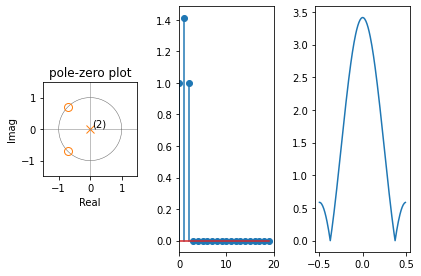

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import fft, fftshift
b = np.array([1,np.sqrt(2),1]) # 분자 -x의 계수
a = np.array([1,0,0]) # 분모 -y의 계수
# 극점-영점 계산과 플롯
fig, ax = plt.subplots(1,3)
z, p, k = zplane(b, a, ax[0])
# z,p,k=signal.tf2zpk(b,a)
print(z, p, k)
r1,p1,k1=signal.residuez(b,a)
print(r1,p1,k1)
fig.tight_layout()

N = 20; imp = (np.arange(N) <= 0) * 1.0;
y3 = signal.lfilter(b, a, imp); ax[1].stem(y3);ax[1].set_xlim([0,20]) # 임펄스 응답
X2,f = ctft(y3,1); ax[2].plot(f,np.abs(X2))